In [33]:
import gym
import gym_maze
import numpy as np
import random
import matplotlib.pyplot as plt

In [34]:
# Create an environment
env = gym.make("maze-random-10x10-plus-v0")
observation = env.reset()

In [35]:
n_observations = 100
n_actions = env.action_space.n

In [36]:
#Initialize the q-table to 0
q_table = np.zeros((n_observations,n_actions))

In [37]:
# Define the maximum number of iterations
NUM_EPISODES = 1000

In [38]:
# Hyperparameters
alpha = 0.1
gamma = 0.9

In [39]:
# Exploration parameters
# Exploration rate
epsilon = 1.0   
# Exploration probability at start
max_epsilon = 1.0 
# Minimum exploration probability 
min_epsilon = 0.01   
# Exponential decay rate for exploration prob
decay_rate = 0.01             

In [40]:
# List of rewards
rewards = []

In [41]:
for episode in range(NUM_EPISODES):
    
    #we initialize the first state of the episode
    state = env.reset()
    row = int(state[0])
    col = int(state[1])
    state_num = (row * 10) + col
    done = False
    total_rewards = 0
    
    while not done:
        # env.render()
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state_num]) # Exploit learned values

        next_state, reward, done, truncated = env.step(action) 
        
        next_state_row = next_state[0]
        next_state_col = next_state[1]
        next_state_num = (next_state_row * 10) + next_state_col
        
        old_value = q_table[state_num, action]
        next_max = np.max(q_table[next_state_num])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state_num, action] = new_value
        
        total_rewards += reward

        state_num = next_state_num
        
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    rewards.append(total_rewards)

    if done or truncated:
        observation = env.reset()

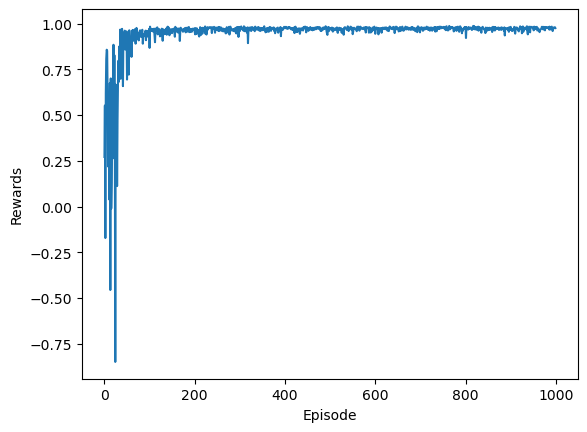

In [42]:
plt.plot(np.arange(NUM_EPISODES), rewards) 
plt.xlabel('Episode') 
plt.ylabel('Rewards')
plt.show()

In [43]:
print(q_table)

[[ 3.57032443e-02  2.36650699e-02  7.73580081e-02  4.12577843e-02]
 [ 2.93959283e-02  1.58771992e-02  2.28557805e-02  4.09598904e-02]
 [-4.90678965e-03 -4.91117437e-03 -4.25774845e-03 -4.94441645e-03]
 [-4.98334859e-03 -5.00338020e-03 -4.97315130e-03 -4.96824882e-03]
 [-4.89611081e-03 -4.88036039e-03 -4.90283771e-03 -4.88733092e-03]
 [-4.72258385e-03 -4.68100533e-03 -4.65920764e-03 -4.66561825e-03]
 [-4.80764154e-03 -4.81820519e-03 -4.81420664e-03 -4.83499823e-03]
 [-4.77527949e-03 -4.78524222e-03 -4.79353408e-03 -4.78248463e-03]
 [-4.45739416e-03 -4.41877342e-03 -4.44793216e-03 -4.43331290e-03]
 [ 4.81959666e-03  2.72054897e-03  7.86260071e-02 -9.02377164e-04]
 [ 5.34421371e-02  5.61813020e-02  1.01209239e-01  4.30246081e-02]
 [ 2.39994890e-03 -4.93798897e-03  4.75618037e-02 -4.99646075e-03]
 [ 8.38833478e-03 -4.30060772e-03 -5.17948229e-03 -5.07210048e-03]
 [-4.57230210e-03 -4.58283859e-03 -4.58818507e-03 -4.69137862e-03]
 [-4.80546604e-03 -4.80314670e-03 -4.78643717e-03 -4.79163441e

In [17]:
# Close the environment
env.close()